We test first-order and second-order differentiation matrices for the function $x + e^{\sin 4x}$ over $[-1,1]$. 

In [1]:
f = x -> x + exp(sin(4*x));

For reference, here are the exact first and second derivatives.

In [2]:
dfdx = x -> 1 + 4*exp(sin(4*x))*cos(4*x);
d2fdx2 = x -> 4*exp(sin(4*x))*(4*cos(4*x)^2-4*sin(4*x));

We discretize on equally spaced nodes and evaluate $f$ at the nodes. 

In [3]:
include("../FNC.jl")
t,Dx,Dxx = FNC.diffmat2(12,[-1,1])
y = f.(t);

Then the first two derivatives of $f$ each require one matrix-vector multiplication.

In [4]:
yx = Dx*y;
yxx = Dxx*y;

The results are fair but not very accurate for this small value of $n$. 

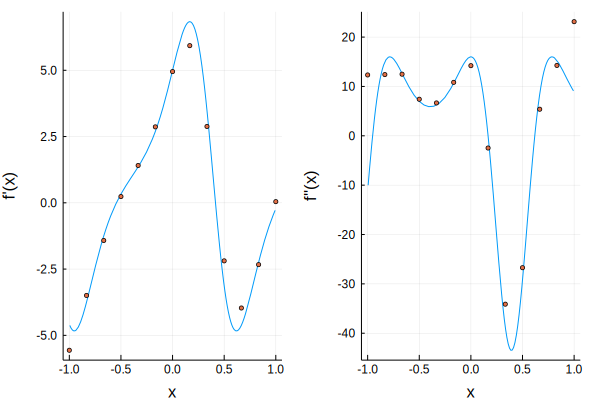

In [5]:
using Plots
plot(dfdx,-1,1,layout=2,subplot=1,xaxis=("x"),yaxis=("f'(x)"),leg=:none)
scatter!(t,yx,m=(2),subplot=1)
plot!(d2fdx2,-1,1,subplot=2,xaxis=("x"),yaxis=("f''(x)"))
scatter!(t,yxx,m=(2),subplot=2,leg=:none)

An experiment confirms the order of accuracy.

In [6]:
using LinearAlgebra   # for norm
n = @. round(Int,2^(4:.5:11) )
err1 = zeros(size(n))
err2 = zeros(size(n))
for (k,n) = enumerate(n)
    t,Dx,Dxx = FNC.diffmat2(n,[-1,1])
    y = f.(t)
    err1[k] = norm( dfdx.(t) - Dx*y, Inf )
    err2[k] = norm( d2fdx2.(t) - Dxx*y, Inf )
end

using DataFrames
DataFrame(n=n,error_first=err1,error_second=err2)

loaded


,n,error_first,error_second
,Int64,Float64,Float64
1,16,0.755235,16.7359
2,23,0.462212,9.08896
3,32,0.270439,4.63461
4,45,0.147625,2.16176
5,64,0.0764738,0.951138
6,91,0.038894,0.415558
7,128,0.019987,0.187604
8,181,0.0101026,0.084895
9,256,0.00508498,0.0390723


For $O(n^{-p})$ convergence, we use a log-log plot of the errors. 

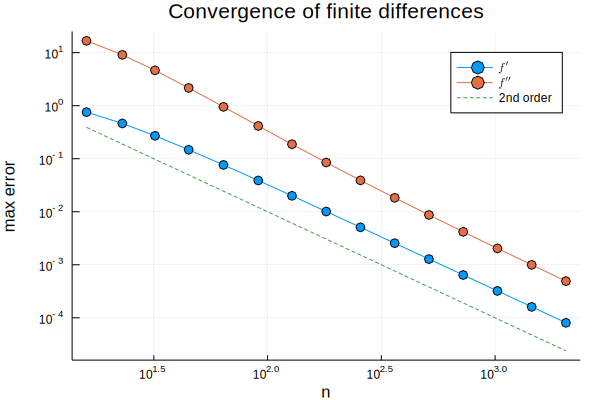

In [7]:
plot(n,[err1 err2],m=:o,label=["\$f'\$" "\$f''\$"])
plot!(n,10*10*n.^(-2),l=:dash,label="2nd order",
    xaxis=(:log10,"n"), yaxis=(:log10,"max error"),
    title="Convergence of finite differences")